In [1]:
%precision 4
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Описание набора данных

- **ph** – кислотно-щелочной баланс воды (0 to 14).
- **Hardness** –  жесткость воды, способность воды осаждать мыло в мг/л.
- **Solids** –  общее количество растворенных твердых веществ в промилле.
- **Chloramines** – количество хлораминов в промилле.
- **Sulfate** – количество сульфатов, растворенных в мг/л.
- **Conductivity**– электрическая проводимость воды в мкс/см.
- **Organic_carbon** – количество органического углерода в промилле.
- **Trihalomethanes** – количество тригалометанов в мкг/л.
- **Turbidity** – мера светоизлучающих свойств воды (мутность воды) в NTU.
- **Potability** – указывает, безопасна ли вода для потребления человеком. переносима - 1 и не переносима - 0


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

присутствуют пропущенные данные

Заполним пропущенные данные средними значениями

In [6]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [7]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [8]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [9]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Теперь пропущенные значения отсутствуют

In [10]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Выполнить разведочный анализ (EDA).

Рассмотрим в скольких случаях вода переносима и не переносима организмом человека.

In [11]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

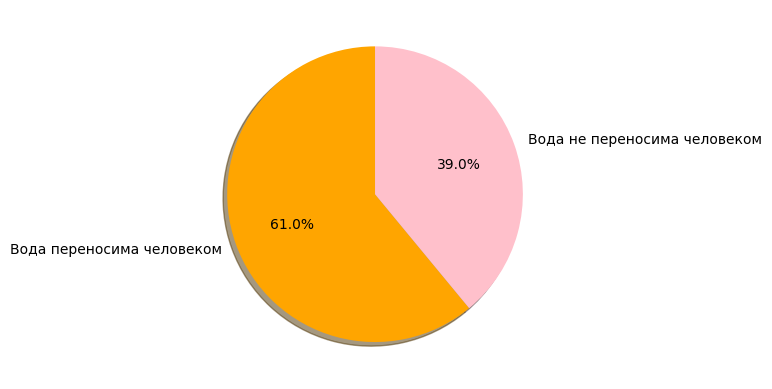

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig2, ax1 = plt.subplots()
columns =["Вода переносима человеком",'Вода не переносима человеком']
colors = ['orange', 'pink']
ax1.pie(df.Potability.value_counts().values, labels=columns, autopct='%1.1f%%',shadow=True, startangle=90,colors=colors)
plt.show()

 переносима в 1278 (39%) случаях и не переносима в 1998(61%) случаях

Дублирующие записи не только искажают статистические показатели датасета, но и снижают качество обучения модели, потому удалим полные дублирующие вхождения.

In [13]:
df.shape

(3276, 10)

In [14]:
df = df.drop_duplicates()
df.shape

(3276, 10)

Дублирующие записи отсутствовали.

Гистограмма по всем колличественных признакам

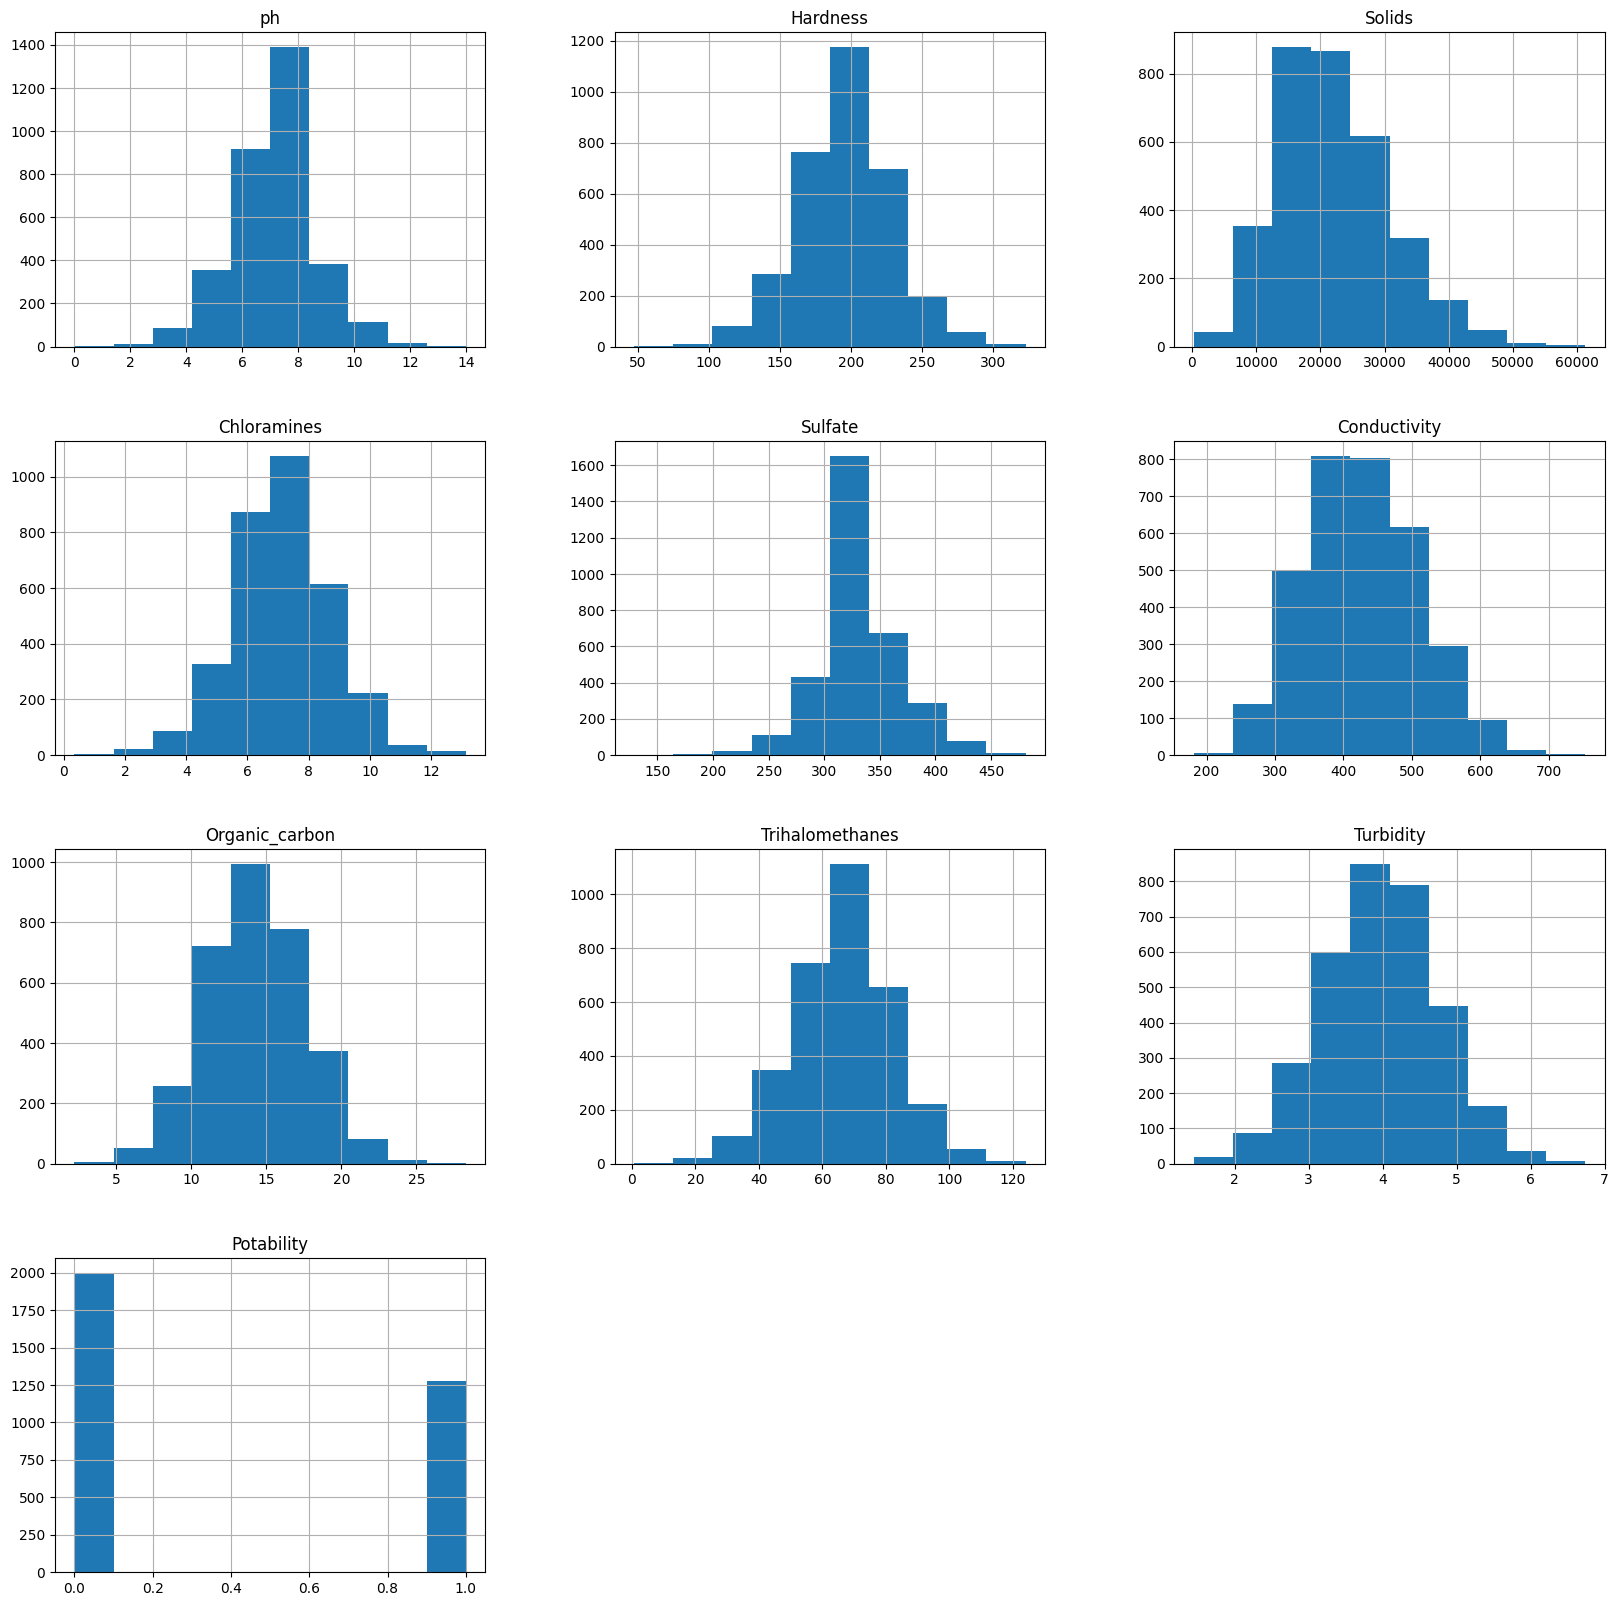

In [15]:
df.hist(figsize =(20,20));

Корелляционная карта помогает выяснить корреляцию между всеми функциями.

In [16]:
corr=df.drop('Potability',axis=1).corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000


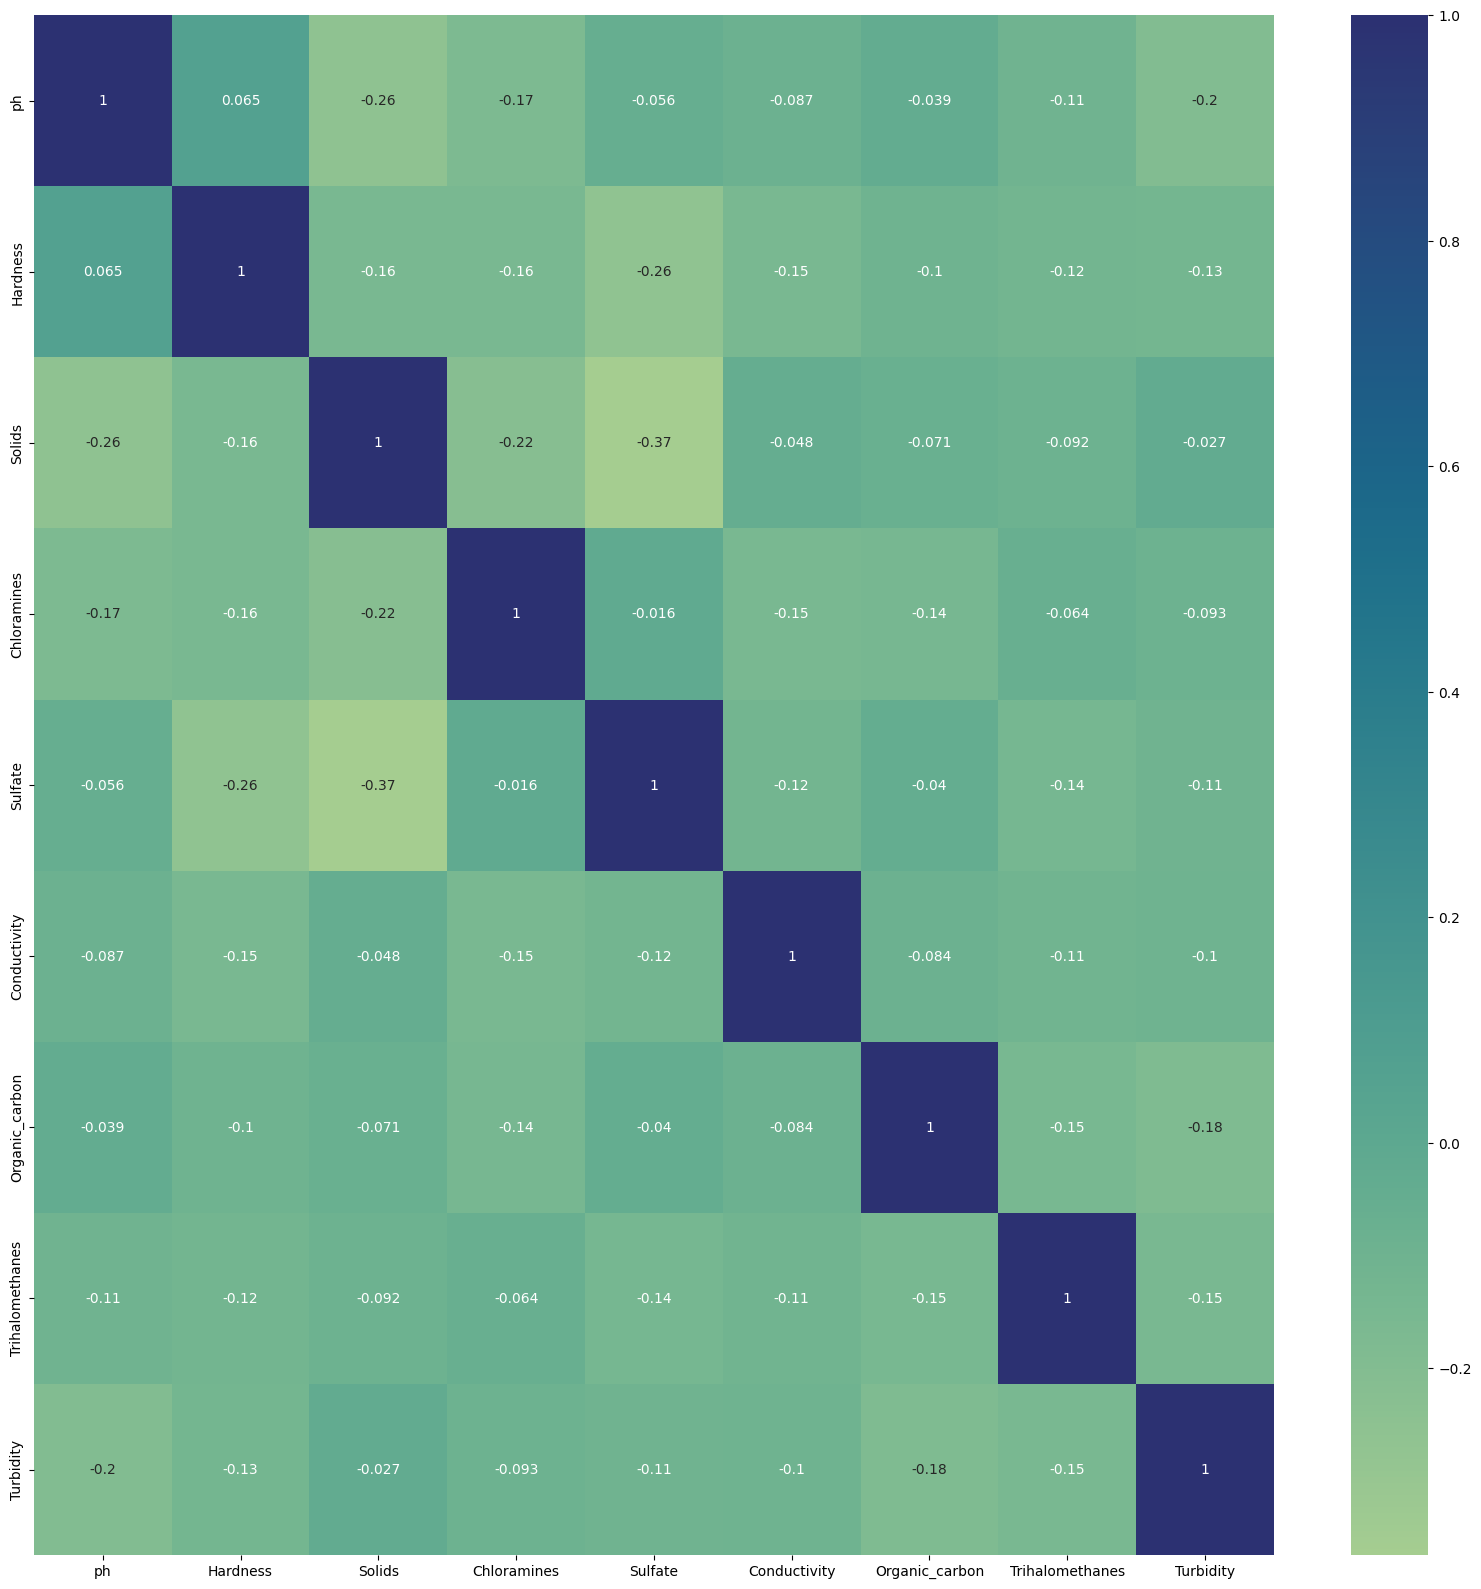

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr.corr(), annot=True, cmap='crest');

Как можно заметить, корреляция между всеми признаками, по-видимому, очень мала.

### Преобразование данных (Data Cleaning) не требуется

### Стандартизация данных

#### Случайным образом разбьём данные на обучающую и тестовую выборки

In [18]:
from sklearn.model_selection import train_test_split

y = df['Potability']
x = df.drop(columns=['Potability'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

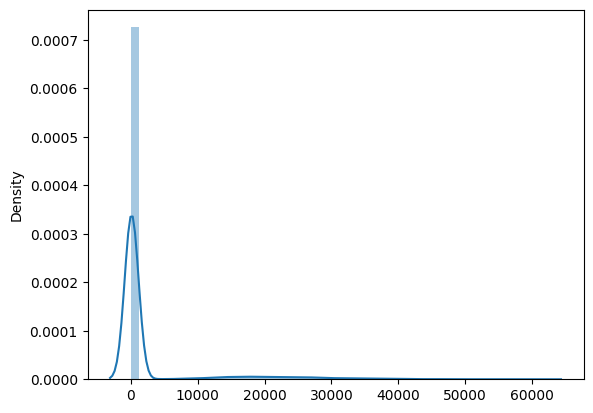

In [19]:
sns.distplot(x_train);

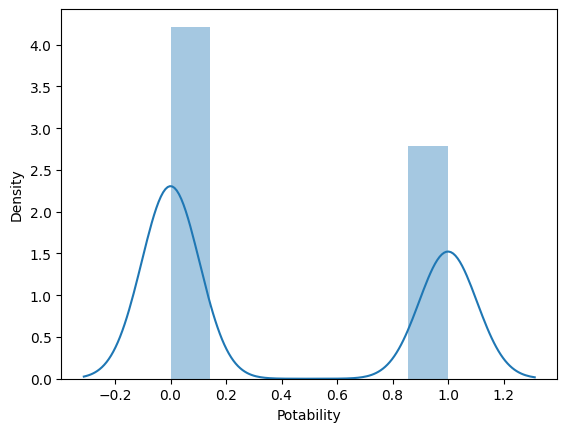

In [20]:
sns.distplot(y_train);

## Произведем масштабирование данных

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
x_train_scaled

array([[-0.03444567, -0.24699831,  0.75053604, ..., -1.11745208,
        -0.20304694, -0.93893423],
       [ 0.07952311, -0.85645535,  0.08009625, ...,  0.65600216,
        -0.12302775,  3.12613141],
       [-0.03444567,  1.4101707 ,  0.80745866, ..., -2.68242954,
         0.0102725 , -0.56055613],
       ...,
       [-0.31230566, -0.29832594,  0.9918901 , ..., -0.13267988,
         1.27809152, -0.60170937],
       [ 1.15963157,  0.65460822, -0.66652007, ...,  0.63894108,
        -1.21918381,  0.40600947],
       [-0.26595555,  0.05287723,  1.41188532, ..., -0.63085449,
         0.0102725 , -0.25756054]])

In [23]:
x_test_scaled

array([[-0.03444567, -0.39705684, -0.18573965, ...,  1.80134604,
         0.03530173,  1.19373867],
       [-0.3035574 , -0.23273491,  1.20934803, ...,  0.13814311,
         0.08725647,  0.77648301],
       [ 0.51890126,  0.83823773,  0.12928234, ..., -0.25699553,
        -1.47272677, -1.89117255],
       ...,
       [ 0.13784381,  1.14049422,  1.06809853, ..., -0.61606393,
        -2.18270594, -0.54924044],
       [ 0.10690194,  0.01314421,  0.86072684, ..., -0.02958553,
        -0.99535315,  1.0354779 ],
       [-0.29638452, -0.73032422,  1.42768574, ...,  0.49243014,
         0.09557107,  1.17415454]])

### Подбор оптимальных признаков с помощью RFEC и кросс-валидация

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=KFold(5), scoring='accuracy')
labelencoder = LabelEncoder()
y_transform = labelencoder.fit_transform(y_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x.columns)
rfecv.fit(x_train_scaled_df, y_transform)

selected_features = list(x_train.columns[rfecv.support_])

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % selected_features)

Optimal number of features: 3
Selected features: ['Hardness', 'Sulfate', 'Organic_carbon']


## Подбор гиперпараметров и реализация методов классификации

## Logistic Regression

In [25]:
scores, accuracies, precision, recall, f1 = {}, {}, {}, {}, {}

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score





lr_searcher = GridSearchCV(LogisticRegression(), [{'solver':[ 'liblinear', 'saga']}], cv=5, verbose=5)
lr_searcher.fit(x_train_scaled, y_train)
print(lr_searcher.best_params_)
print("Logistic Regression score =", lr_searcher.best_score_)
scores['LR'] = lr_searcher.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..................solver=liblinear;, score=0.603 total time=   0.0s
[CV 2/5] END ..................solver=liblinear;, score=0.599 total time=   0.0s
[CV 3/5] END ..................solver=liblinear;, score=0.599 total time=   0.0s
[CV 4/5] END ..................solver=liblinear;, score=0.603 total time=   0.0s
[CV 5/5] END ..................solver=liblinear;, score=0.605 total time=   0.0s
[CV 1/5] END .......................solver=saga;, score=0.603 total time=   0.0s
[CV 2/5] END .......................solver=saga;, score=0.599 total time=   0.0s
[CV 3/5] END .......................solver=saga;, score=0.599 total time=   0.0s
[CV 4/5] END .......................solver=saga;, score=0.603 total time=   0.0s
[CV 5/5] END .......................solver=saga;, score=0.605 total time=   0.0s
{'solver': 'liblinear'}
Logistic Regression score = 0.6018333000352009


In [27]:
model = LogisticRegression(solver = 'liblinear')
model.fit(x_train_scaled, y_train)
lr_prediction = model.predict(x_test_scaled)
print(f'Logistic Regression accuracy: {accuracy_score(y_test, lr_prediction)}')
print(f'Logistic Regression precision: {precision_score(y_test, lr_prediction)}')
print(f'Logistic Regression recall: {recall_score(y_test, lr_prediction)}')
print(f'Logistic Regression f1: {f1_score(y_test, lr_prediction)}')

accuracies['LR'] = accuracy_score(y_test, lr_prediction)
precision['LR'] = precision_score(y_test, lr_prediction)
recall['LR'] = recall_score(y_test, lr_prediction)
f1['LR'] = f1_score(y_test, lr_prediction)

Logistic Regression accuracy: 0.6286876907426246
Logistic Regression precision: 1.0
Logistic Regression recall: 0.00273224043715847
Logistic Regression f1: 0.005449591280653952


In [28]:
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       1.00      0.00      0.01       366

    accuracy                           0.63       983
   macro avg       0.81      0.50      0.39       983
weighted avg       0.77      0.63      0.49       983



### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_searcher = GridSearchCV(KNeighborsClassifier(), [{'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}], cv=5, verbose=5)
knn_searcher.fit(x_train_scaled, y_train)
print(knn_searcher.best_params_)
print("KNN score =", knn_searcher.best_score_)
scores['KNN'] = knn_searcher.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.625 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.599 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.630 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.566 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.622 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.625 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.599 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.630 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.563 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.622 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.617 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

In [32]:
model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(x_train_scaled, y_train)
knn_prediction = model.predict(x_test_scaled)
print(f'KNN accuracy: {accuracy_score(y_test, knn_prediction)}')
print(f'KNN precision: {precision_score(y_test, knn_prediction)}')
print(f'KNN recall: {recall_score(y_test, knn_prediction)}')
print(f'KNN f1: {f1_score(y_test, knn_prediction)}')
accuracies['KNN'] = accuracy_score(y_test, knn_prediction)
precision['KNN'] = precision_score(y_test, knn_prediction)
recall['KNN'] = recall_score(y_test, knn_prediction)
f1['KNN'] = f1_score(y_test, knn_prediction)

KNN accuracy: 0.6307222787385555
KNN precision: 0.5052631578947369
KNN recall: 0.39344262295081966
KNN f1: 0.44239631336405527


In [33]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       617
           1       0.51      0.39      0.44       366

    accuracy                           0.63       983
   macro avg       0.59      0.58      0.58       983
weighted avg       0.62      0.63      0.62       983



### SVM

In [34]:
from sklearn.svm import SVC

svm_searcher = GridSearchCV(SVC(), [{'C': [0.0001, 0.01, 0.1], 'kernel': ['linear', 'rbf', 'sigmoid']}], cv=5, verbose=5)
svm_searcher.fit(x_train_scaled, y_train)
print(svm_searcher.best_params_)
print("SVM score =", svm_searcher.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...........C=0.0001, kernel=linear;, score=0.603 total time=   0.0s
[CV 2/5] END ...........C=0.0001, kernel=linear;, score=0.601 total time=   0.0s
[CV 3/5] END ...........C=0.0001, kernel=linear;, score=0.601 total time=   0.0s
[CV 4/5] END ...........C=0.0001, kernel=linear;, score=0.603 total time=   0.0s
[CV 5/5] END ...........C=0.0001, kernel=linear;, score=0.603 total time=   0.0s
[CV 1/5] END ..............C=0.0001, kernel=rbf;, score=0.603 total time=   0.2s
[CV 2/5] END ..............C=0.0001, kernel=rbf;, score=0.601 total time=   0.2s
[CV 3/5] END ..............C=0.0001, kernel=rbf;, score=0.601 total time=   0.2s
[CV 4/5] END ..............C=0.0001, kernel=rbf;, score=0.603 total time=   0.2s
[CV 5/5] END ..............C=0.0001, kernel=rbf;, score=0.603 total time=   0.2s
[CV 1/5] END ..........C=0.0001, kernel=sigmoid;, score=0.603 total time=   0.1s
[CV 2/5] END ..........C=0.0001, kernel=sigmoid;,

In [37]:
model = SVC(C = 0.1, kernel = 'sigmoid')
model.fit(x_train_scaled, y_train)
svm_prediction = model.predict(x_test_scaled)
print(f'SVM accuracy: {accuracy_score(y_test, svm_prediction)}')
print(f'SVM precision: {precision_score(y_test, svm_prediction)}')
print(f'SVM recall: {recall_score(y_test, svm_prediction)}')
print(f'SVM f1: {f1_score(y_test, svm_prediction)}')
accuracies['SVM'] = accuracy_score(y_test, svm_prediction)
precision['SVM'] = precision_score(y_test, svm_prediction)
recall['SVM'] = recall_score(y_test, svm_prediction)
f1['SVM'] = f1_score(y_test, svm_prediction)

SVM accuracy: 0.6286876907426246
SVM precision: 0.6666666666666666
SVM recall: 0.00546448087431694
SVM f1: 0.01084010840108401


In [38]:
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.67      0.01      0.01       366

    accuracy                           0.63       983
   macro avg       0.65      0.50      0.39       983
weighted avg       0.64      0.63      0.49       983



### Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

nb_searcher = GridSearchCV(GaussianNB(), [{"priors": [[0.75, 0.25], [0.33, 0.67]],"var_smoothing": np.logspace(0, -10, num=100)}], cv=5, verbose=5)
nb_searcher.fit(x_train_scaled, y_train)
print(nb_searcher.best_params_)
print("Naive Bayes score =", nb_searcher.best_score_)
scores['NB'] = nb_searcher.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.608 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.601 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.601 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.603 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=1.0;, score=0.603 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.608 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.603 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.603 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.605 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.7924828983539173;, score=0.605 total time=   0.0s
[CV 1/5] EN

[CV 2/5] END priors=[0.75, 0.25], var_smoothing=0.0011768119524349992;, score=0.612 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=0.0011768119524349992;, score=0.601 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.0011768119524349992;, score=0.627 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.0011768119524349992;, score=0.618 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=0.0009326033468832199;, score=0.612 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=0.0009326033468832199;, score=0.612 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=0.0009326033468832199;, score=0.601 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=0.0009326033468832199;, score=0.627 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=0.0009326033468832199;, score=0.618 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=0.0007390722033525783;, s

[CV 4/5] END priors=[0.75, 0.25], var_smoothing=1.747528400007683e-06;, score=0.627 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=1.747528400007683e-06;, score=0.618 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=1.3848863713938746e-06;, score=0.612 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=1.3848863713938746e-06;, score=0.610 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=1.3848863713938746e-06;, score=0.601 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=1.3848863713938746e-06;, score=0.627 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=1.3848863713938746e-06;, score=0.618 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=1.0974987654930568e-06;, score=0.612 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=1.0974987654930568e-06;, score=0.610 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=1.0974987654930568

[CV 4/5] END priors=[0.75, 0.25], var_smoothing=2.595024211399732e-09;, score=0.627 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=2.595024211399732e-09;, score=0.618 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=2.0565123083486515e-09;, score=0.612 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=2.0565123083486515e-09;, score=0.610 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=2.0565123083486515e-09;, score=0.601 total time=   0.0s
[CV 4/5] END priors=[0.75, 0.25], var_smoothing=2.0565123083486515e-09;, score=0.627 total time=   0.0s
[CV 5/5] END priors=[0.75, 0.25], var_smoothing=2.0565123083486515e-09;, score=0.618 total time=   0.0s
[CV 1/5] END priors=[0.75, 0.25], var_smoothing=1.6297508346206469e-09;, score=0.612 total time=   0.0s
[CV 2/5] END priors=[0.75, 0.25], var_smoothing=1.6297508346206469e-09;, score=0.610 total time=   0.0s
[CV 3/5] END priors=[0.75, 0.25], var_smoothing=1.6297508346206469

[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.427 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.431 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.413 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.06135907273413173;, score=0.408 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.04862601580065353;, score=0.423 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.04862601580065353;, score=0.427 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.04862601580065353;, score=0.431 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.04862601580065353;, score=0.415 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.04862601580065353;, score=0.408 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.03853528593710529;, score=0.423 total tim

[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.0002915053062825176;, score=0.428 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.0002915053062825176;, score=0.410 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.00023101297000831605;, score=0.420 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.00023101297000831605;, score=0.431 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.00023101297000831605;, score=0.434 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=0.00023101297000831605;, score=0.428 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=0.00023101297000831605;, score=0.410 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=0.0001830738280295368;, score=0.420 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=0.0001830738280295368;, score=0.431 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=0.000183073828029536

[CV 4/5] END priors=[0.33, 0.67], var_smoothing=6.892612104349695e-07;, score=0.428 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=6.892612104349695e-07;, score=0.410 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=5.462277217684348e-07;, score=0.420 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=5.462277217684348e-07;, score=0.431 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=5.462277217684348e-07;, score=0.434 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=5.462277217684348e-07;, score=0.428 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=5.462277217684348e-07;, score=0.410 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=4.3287612810830616e-07;, score=0.420 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=4.3287612810830616e-07;, score=0.431 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=4.3287612810830616e-07;

[CV 1/5] END priors=[0.33, 0.67], var_smoothing=6.428073117284319e-10;, score=0.420 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=6.428073117284319e-10;, score=0.431 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=6.428073117284319e-10;, score=0.434 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=6.428073117284319e-10;, score=0.428 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=6.428073117284319e-10;, score=0.410 total time=   0.0s
[CV 1/5] END priors=[0.33, 0.67], var_smoothing=5.094138014816385e-10;, score=0.420 total time=   0.0s
[CV 2/5] END priors=[0.33, 0.67], var_smoothing=5.094138014816385e-10;, score=0.431 total time=   0.0s
[CV 3/5] END priors=[0.33, 0.67], var_smoothing=5.094138014816385e-10;, score=0.434 total time=   0.0s
[CV 4/5] END priors=[0.33, 0.67], var_smoothing=5.094138014816385e-10;, score=0.428 total time=   0.0s
[CV 5/5] END priors=[0.33, 0.67], var_smoothing=5.094138014816385e-10;, s

In [41]:
model = GaussianNB(priors = [0.75, 0.25], var_smoothing = 0.0774263682681127)
model.fit(x_train_scaled, y_train)
nb_prediction = model.predict(x_test_scaled)
print(f'Naive Bayes accuracy: {accuracy_score(y_test, nb_prediction)}')
print(f'Naive Bayes precision: {precision_score(y_test, nb_prediction)}')
print(f'Naive Bayes recall: {recall_score(y_test, nb_prediction)}')
print(f'Naive Bayes f1: {f1_score(y_test, nb_prediction)}')
accuracies['NB'] = accuracy_score(y_test, nb_prediction)
precision['NB'] = precision_score(y_test, nb_prediction)
recall['NB'] = recall_score(y_test, nb_prediction)
f1['NB'] = f1_score(y_test, nb_prediction)
print(f'Logistic Regression AUC: {roc_auc_score(y_test, nb_prediction)}')

Naive Bayes accuracy: 0.6449643947100712
Naive Bayes precision: 0.7073170731707317
Naive Bayes recall: 0.07923497267759563
Naive Bayes f1: 0.14250614250614252
Logistic Regression AUC: 0.5298930130810993


In [42]:
print(classification_report(y_test, nb_prediction))

              precision    recall  f1-score   support

           0       0.64      0.98      0.78       617
           1       0.71      0.08      0.14       366

    accuracy                           0.64       983
   macro avg       0.67      0.53      0.46       983
weighted avg       0.67      0.64      0.54       983



## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_searcher = GridSearchCV(DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}], cv=5, verbose=5)
dt_searcher.fit(x_train_scaled, y_train)
print(dt_searcher.best_params_)
print("Decision Tree score =", dt_searcher.best_score_)
scores['DT'] = dt_searcher.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......criterion=gini, max_depth=1;, score=0.619 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=1;, score=0.612 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=1;, score=0.577 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=1;, score=0.622 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=1;, score=0.607 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.614 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.614 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.603 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.629 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.607 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.619 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3

In [50]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
model.fit(x_train_scaled, y_train)
dt_prediction = model.predict(x_test_scaled)
print(f'Decision Tree accuracy: {accuracy_score(y_test, dt_prediction)}')
print(f'Decision Tree precision: {precision_score(y_test, dt_prediction)}')
print(f'Decision Tree recall: {recall_score(y_test, dt_prediction)}')
print(f'Decision Tree f1: {f1_score(y_test, dt_prediction)}')
accuracies['DT'] = accuracy_score(y_test, dt_prediction)
precision['DT'] = precision_score(y_test, dt_prediction)
recall['DT'] = recall_score(y_test, dt_prediction)
f1['DT'] = f1_score(y_test, dt_prediction)
print(f'Logistic Regression AUC: {roc_auc_score(y_test, dt_prediction)}')

Decision Tree accuracy: 0.6358087487283826
Decision Tree precision: 0.5229885057471264
Decision Tree recall: 0.24863387978142076
Decision Tree f1: 0.337037037037037
Logistic Regression AUC: 0.5570559998582955


In [102]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       617
           1       0.52      0.25      0.33       366

    accuracy                           0.64       983
   macro avg       0.59      0.56      0.54       983
weighted avg       0.61      0.64      0.59       983



## Сравнение алгоритмов и  метрик


In [103]:
accuracies

{'LR': 0.6287, 'KNN': 0.6307, 'SVM': 0.6287, 'NB': 0.6450, 'DT': 0.6358}

In [104]:
precision

{'LR': 1.0000, 'KNN': 0.5053, 'SVM': 0.6667, 'NB': 0.7073, 'DT': 0.5233}

In [105]:
recall

{'LR': 0.0027, 'KNN': 0.3934, 'SVM': 0.0055, 'NB': 0.0792, 'DT': 0.2459}

In [107]:
f1

{'LR': 0.0054, 'KNN': 0.4424, 'SVM': 0.0108, 'NB': 0.1425, 'DT': 0.3346}

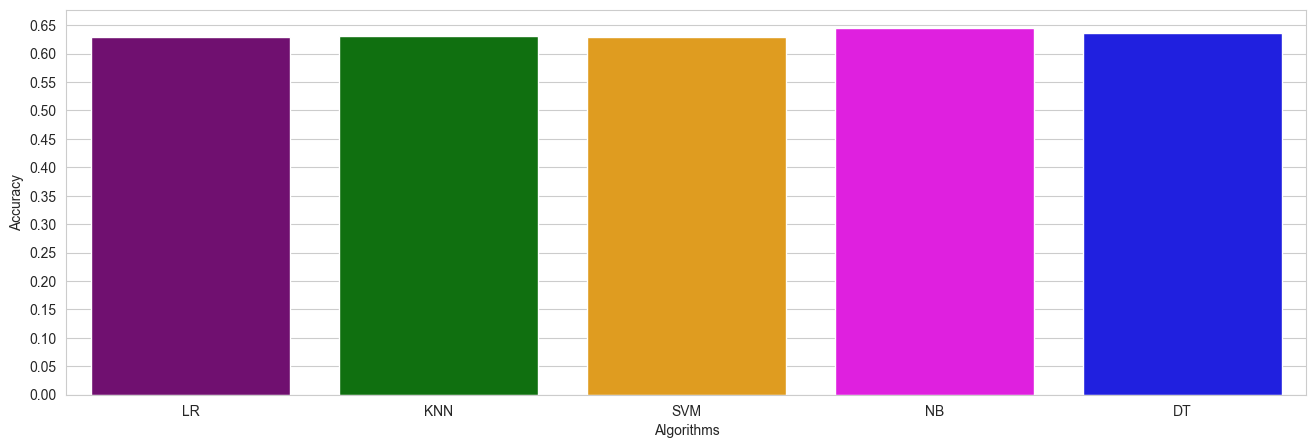

In [108]:
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

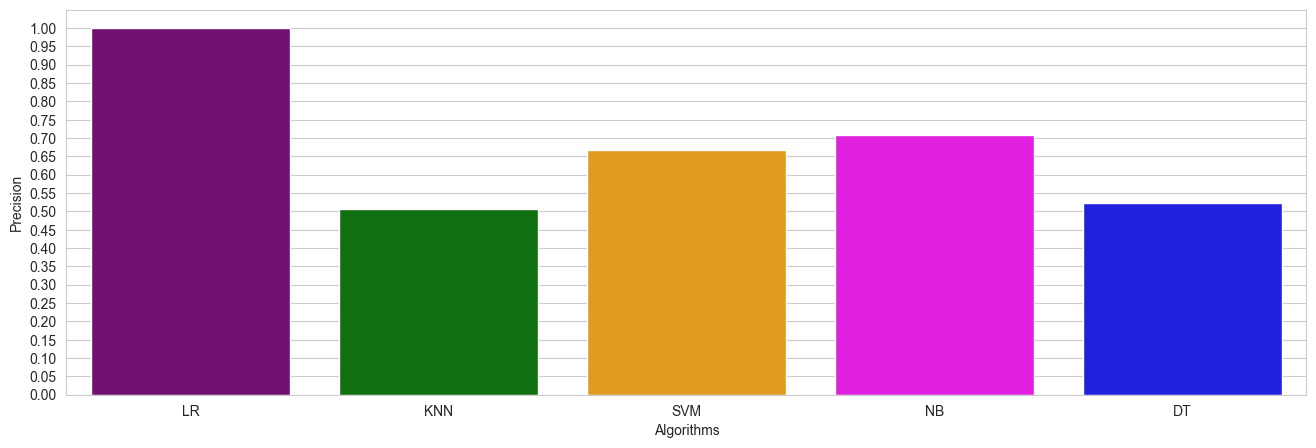

In [109]:
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("Precision")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(precision.keys()), y=list(precision.values()), palette=colors)
plt.show()

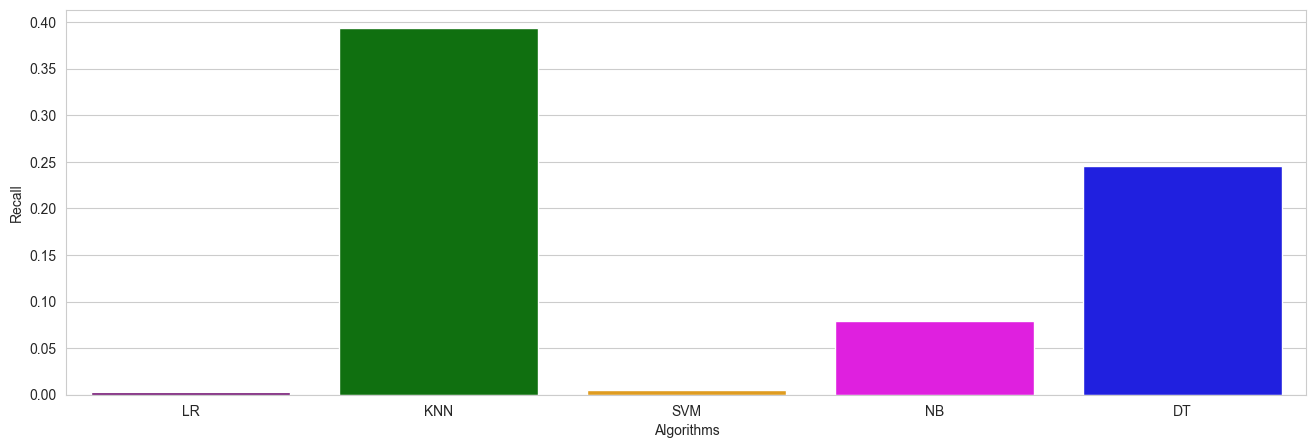

In [110]:
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("Recall")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(recall.keys()), y=list(recall.values()), palette=colors)
plt.show()

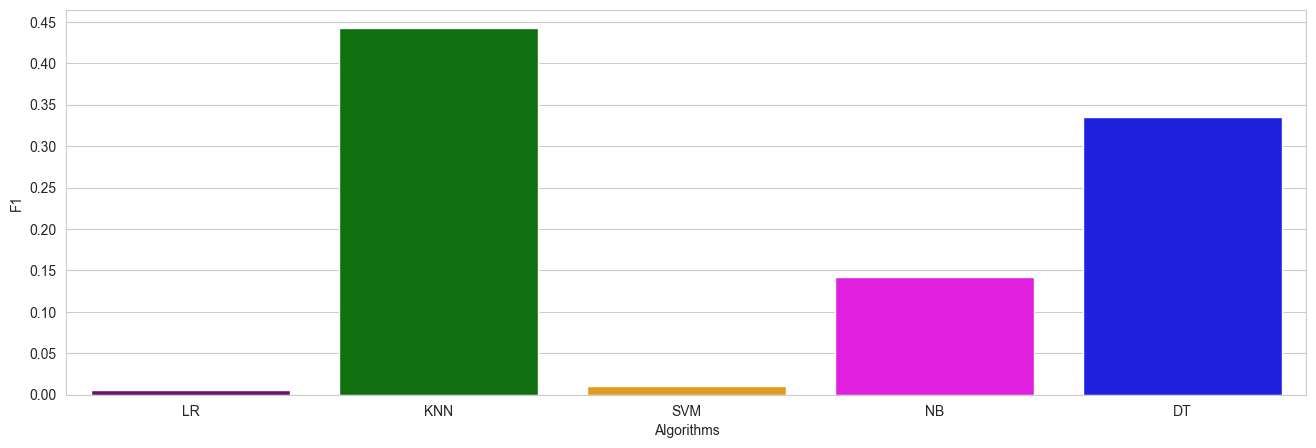

In [111]:
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.ylabel("F1")
plt.xlabel("Algorithms")
plt.yticks(np.arange(0, 1.05, 0.05))
sns.barplot(x=list(f1.keys()), y=list(f1.values()), palette=colors)
plt.show()